In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [2]:
rawdata = pd.read_csv(r'C:\Users\52296881\Downloads\mobile_price_data.csv')
rawdata.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [3]:
df = rawdata.copy()

In [4]:
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

459
406


In [5]:
df.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Samsung Galaxy A21s (Blue, 64 GB)","₹9,999",Black,Dual Sim,15.8 cm (6.22 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,2,17,24,405,42,59,107,393,133,157,130,60,100,109,406,124,25,23,46,27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 447
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    406 non-null    object
 1   mobile_price   406 non-null    object
 2   mobile_color   406 non-null    object
 3   dual_sim       406 non-null    object
 4   disp_size      406 non-null    object
 5   resolution     406 non-null    object
 6   os             406 non-null    object
 7   num_cores      406 non-null    object
 8   mp_speed       406 non-null    object
 9   int_memory     406 non-null    object
 10  ram            406 non-null    object
 11  p_cam          406 non-null    object
 12  f_cam          406 non-null    object
 13  network        406 non-null    object
 14  bluetooth      406 non-null    object
 15  battery_power  406 non-null    object
 16  mob_width      406 non-null    object
 17  mob_height     406 non-null    object
 18  mob_depth      406 non-null   

In [7]:
df.columns

Index(['mobile_name', 'mobile_price', 'mobile_color', 'dual_sim', 'disp_size',
       'resolution', 'os', 'num_cores', 'mp_speed', 'int_memory', 'ram',
       'p_cam', 'f_cam', 'network', 'bluetooth', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight'],
      dtype='object')

In [8]:
#removing irrelavent features
df.drop(['mobile_name','mobile_color','bluetooth'],axis=1,inplace = True)

In [9]:
def numericize(df,col):
    return pd.to_numeric(df[col].str.replace('[a-zA-Z]','',regex=True))
df['mp_speed'] = numericize(df,'mp_speed')
df['int_memory'] = numericize(df,'int_memory')
df['ram'] = numericize(df,'ram')
df['battery_power'] = numericize(df,'battery_power')
df['mob_width'] = numericize(df,'mob_width')
df['mob_height'] = numericize(df,'mob_height')
df['mob_depth'] = numericize(df,'mob_depth')
df['mob_weight'] = numericize(df,'mob_weight')
df['mobile_price'] = df['mobile_price'].replace('\D', '', regex=True).astype(int)

In [10]:
df

,mobile_price,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,8999,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
1,8999,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
2,9999,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
3,9999,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.0,164.4,8.95,195.0
4,11999,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,128,4,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",5000,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,13990,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5,64,4,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",3180,73.1,150.5,7.70,143.0
441,17000,Dual Sim,16.0 cm (6.3 inch),2340 x 1080 pixels,Android Oreo 8.1.0,Octa Core,2.0,64,4,16MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",3500,74.0,156.7,7.99,169.0
442,15000,Dual Sim,15.75 cm (6.2 inch),1520 x 720 Pixels,Android Oreo 8.1,Octa Core,1.8,64,4,13MP + 2MP,8MP Front Camera,"3G, 4G, 2G",4230,75.6,156.2,8.20,168.0
446,41990,Dual Sim,16.76 cm (6.6 inch),2340 x 1080 pixels,Android Pie 9.0,Octa Core,2.8,256,8,48MP + 13MP + 8MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",4065,77.2,162.0,9.30,215.0


In [11]:
df['f_cam'].unique()

array(['5MP Front Camera', '16MP Front Camera',
       '32MP + 8MP Dual Front Camera', '16MP + 8MP Dual Front Camera',
       '13MP Front Camera', '32MP Front Camera', '8MP Front Camera',
       '20MP Front Camera', '20MP + 2MP Dual Front Camera',
       '2MP Front Camera', '8MP Dual Front Camera', '25MP Front Camera',
       '24MP Front Camera', '13MP + 2MP Dual Front Camera',
       '44MP + 2MP Dual Front Camera'], dtype=object)

In [12]:
df['p_cam'].unique()

array(['12MP + 2MP + 2MP', '48MP + 8MP + 2MP + 2MP',
       '48MP + 8MP + 2MP + 2MP Quad Camera', '64MP + 13MP + 8MP + 2MP',
       '16MP + 2MP', '64MP + 8MP + 2MP + 2MP Quad Camera',
       '64MP + 12MP + 8MP + 2MP', '12MP + 2MP', '64MP + 8MP + 2MP + 2MP',
       '13MP + 2MP', '64MP + 8MP + 8MP + 2MP', '48MP + 13MP + 8MP',
       '48MP + 8MP + 5MP + 2MP', '48MP + 8MP + 2MP', '48MP + 5MP',
       '12MP Rear Camera', '12MP + 5MP', '20MP + 12MP',
       '108MP Rear Camera', '13MP Rear Camera', '48MP + 8MP',
       '64MP + 8MP + 5MP + 2MP', '8MP Rear Camera', '13MP + 2MP + 8MP',
       '13MP + 8MP + 2MP', '13MP + 8MP + 2MP + 2MP', '16MP + 2MP + 8MP',
       '16MP + 8MP + 2MP', '48MP + 5MP + 8MP',
       '48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple Rear Camera',
       '48MP + 13MP + 8MP + 2MP', '12MP + 5MP + 8MP', '16MP Rear Camera',
       '16MP + 5MP', '48MP + 8MP + 5MP', '64MP + 8MP + 5MP + 5MP',
       '48MP + 12MP + 5MP', '5MP Rear Camera',
      

In [13]:
df['network'].unique()

array(['4G VOLTE, 4G, 3G, 2G', '3G, 4G VOLTE, 2G', '3G, 4G VOLTE, 4G, 2G',
       '3G, 4G, 2G', '4G, 2G, 3G', '5G, 4G VOLTE, 4G, 3G, 2G',
       '4G VOLTE, 3G, 2G', '4G VOLTE, 3G', '4G VOLTE, 4G, 2G, 3G',
       '4G VOLTE, 5G', '3G, 4G VOLTE, 4G', '3G', '4G VOLTE',
       '3G, 4G VOLTE', '2G', '4G, 3G, 2G', '3G, 4G', '4G VOLTE, 4G'],
      dtype=object)

In [15]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(exclude = np.number):
    df[col] = le.fit_transform(df[col])

In [16]:
df

,mobile_price,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,8999,0,29,19,0,0,2.0,32,3,4,12,13,5000,75.0,164.4,8.95,195.0
1,8999,0,29,19,0,0,2.0,32,3,4,12,13,5000,75.0,164.4,8.95,195.0
2,9999,0,29,19,0,0,2.0,64,4,4,12,13,5000,75.0,164.4,8.95,195.0
3,9999,0,29,19,0,0,2.0,64,4,4,12,13,5000,75.0,164.4,8.95,195.0
4,11999,0,28,19,0,0,2.0,128,4,36,3,13,5000,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,13990,0,6,8,8,0,2.5,64,4,15,14,4,3180,73.1,150.5,7.70,143.0
441,17000,0,21,30,14,0,2.0,64,4,17,3,6,3500,74.0,156.7,7.99,169.0
442,15000,0,16,11,13,0,1.8,64,4,10,14,7,4230,75.6,156.2,8.20,168.0
446,41990,0,33,30,17,0,2.8,256,8,28,3,6,4065,77.2,162.0,9.30,215.0


In [17]:
df.corr()

,mobile_price,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight
mobile_price,1.000000,-0.015311,0.405834,0.179154,-0.145818,-0.119140,0.605886,0.763518,0.767308,0.312339,-0.163709,0.140214,-0.007744,0.084071,0.087873,-0.120982,0.385553
dual_sim,-0.015311,1.000000,-0.109230,-0.009857,-0.089523,0.245408,0.025110,-0.054644,-0.069951,-0.025031,0.011499,-0.088787,-0.092267,-0.001749,-0.052860,-0.010758,-0.101577
disp_size,0.405834,-0.109230,1.000000,0.443661,-0.177461,-0.290614,0.453241,0.457805,0.490281,0.494820,-0.193719,0.521894,0.594415,-0.018000,0.363951,-0.018065,0.760431
resolution,0.179154,-0.009857,0.443661,1.000000,-0.078747,-0.065641,0.196843,0.189762,0.279424,0.314721,-0.268641,0.129417,0.248662,0.018231,0.082970,0.003707,0.385676
os,-0.145818,-0.089523,-0.177461,-0.078747,1.000000,-0.085979,-0.033671,-0.146241,-0.182480,-0.221424,0.093296,-0.420747,-0.082372,-0.141464,-0.040158,0.095917,-0.170120
num_cores,-0.119140,0.245408,-0.290614,-0.065641,-0.085979,1.000000,-0.305592,-0.183264,-0.205943,0.023970,0.125163,-0.109915,-0.335435,0.141367,-0.386104,0.086161,-0.336802
mp_speed,0.605886,0.025110,0.453241,0.196843,-0.033671,-0.305592,1.000000,0.572689,0.582441,0.244018,-0.141041,0.106689,0.191224,0.001427,0.186679,-0.048959,0.535611
int_memory,0.763518,-0.054644,0.457805,0.189762,-0.146241,-0.183264,0.572689,1.000000,0.785240,0.362448,-0.224600,0.202898,0.159605,0.046594,0.142044,-0.078864,0.474162
ram,0.767308,-0.069951,0.490281,0.279424,-0.182480,-0.205943,0.582441,0.785240,1.000000,0.449390,-0.280897,0.242848,0.107400,0.051346,0.197621,-0.126678,0.511347
p_cam,0.312339,-0.025031,0.494820,0.314721,-0.221424,0.023970,0.244018,0.362448,0.449390,1.000000,-0.293121,0.363332,0.154028,-0.020278,0.105816,0.005461,0.424100


<AxesSubplot:ylabel='mobile_price'>

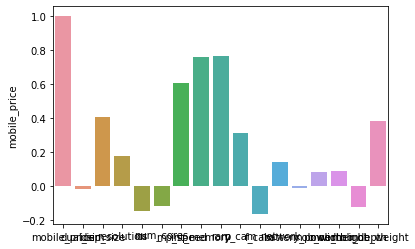

In [18]:
sns.barplot(x=df.corr().columns, y = df.corr()['mobile_price'])

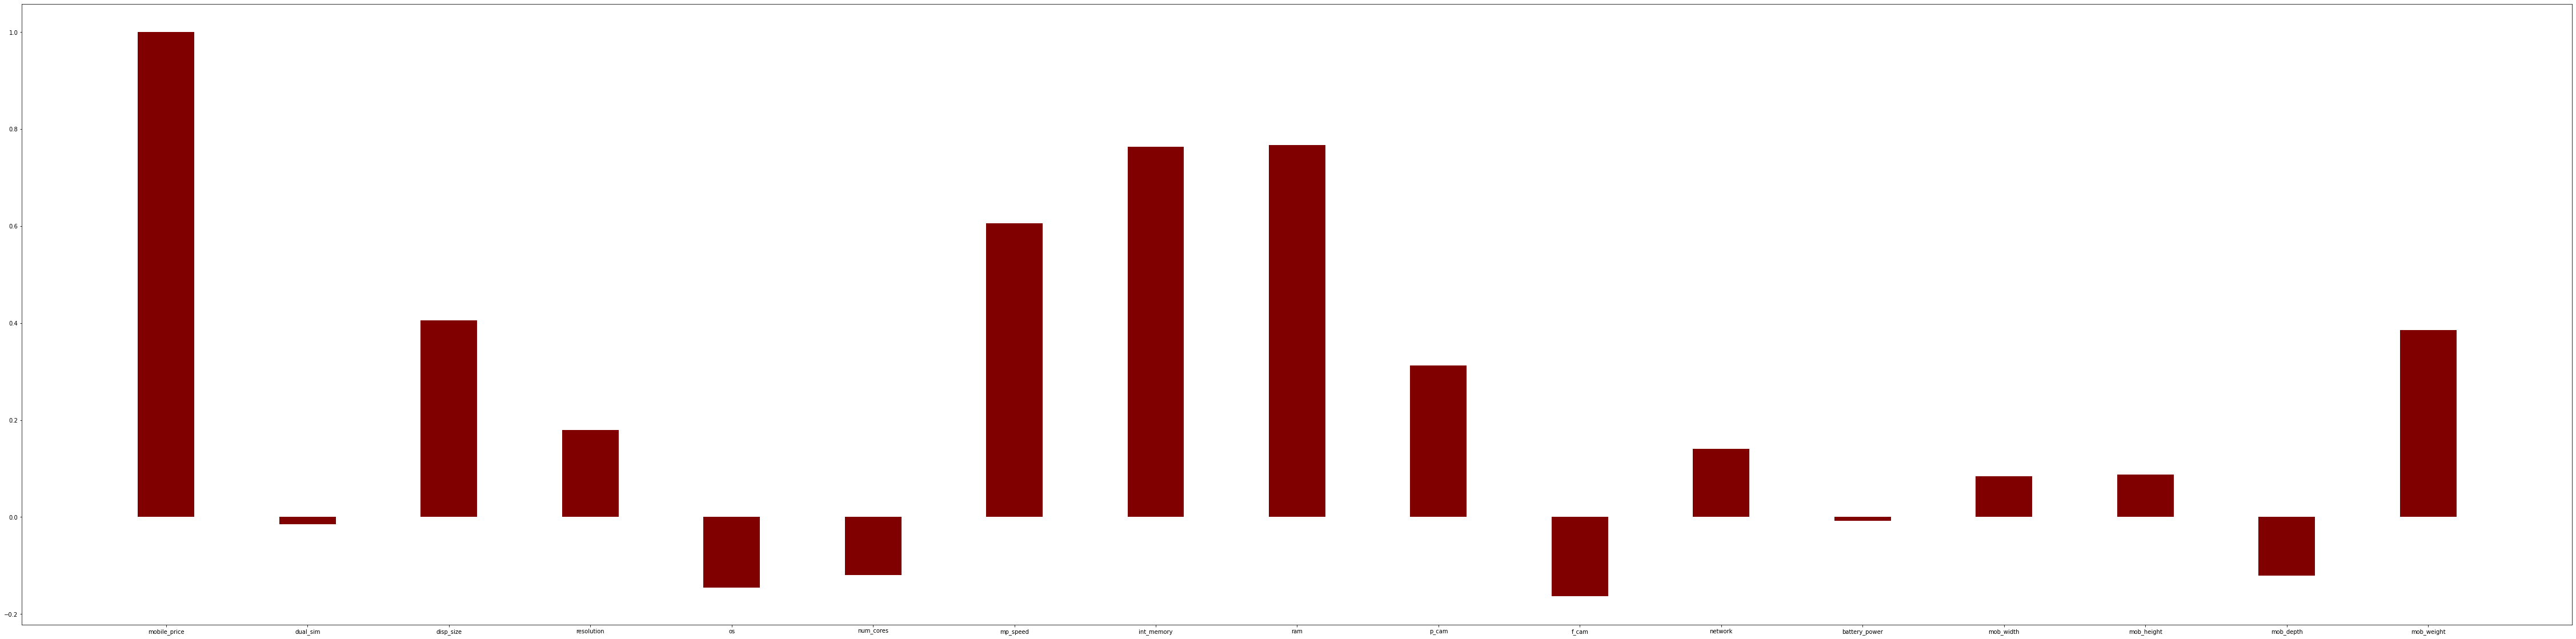

In [19]:
import matplotlib.pyplot as plt  
fig = plt.figure(figsize = (80, 20))
plt.bar(df.corr().columns, df.corr()['mobile_price'] , color ='maroon', width = 0.4)
plt.show()

In [20]:
df.columns

Index(['mobile_price', 'dual_sim', 'disp_size', 'resolution', 'os',
       'num_cores', 'mp_speed', 'int_memory', 'ram', 'p_cam', 'f_cam',
       'network', 'battery_power', 'mob_width', 'mob_height', 'mob_depth',
       'mob_weight'],
      dtype='object')

In [21]:
#removing very low correlation columns
df.drop(['dual_sim','battery_power'],axis=1,inplace=True)

In [22]:
df

,mobile_price,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,mob_width,mob_height,mob_depth,mob_weight
0,8999,29,19,0,0,2.0,32,3,4,12,13,75.0,164.4,8.95,195.0
1,8999,29,19,0,0,2.0,32,3,4,12,13,75.0,164.4,8.95,195.0
2,9999,29,19,0,0,2.0,64,4,4,12,13,75.0,164.4,8.95,195.0
3,9999,29,19,0,0,2.0,64,4,4,12,13,75.0,164.4,8.95,195.0
4,11999,28,19,0,0,2.0,128,4,36,3,13,75.4,164.4,9.00,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,13990,6,8,8,0,2.5,64,4,15,14,4,73.1,150.5,7.70,143.0
441,17000,21,30,14,0,2.0,64,4,17,3,6,74.0,156.7,7.99,169.0
442,15000,16,11,13,0,1.8,64,4,10,14,7,75.6,156.2,8.20,168.0
446,41990,33,30,17,0,2.8,256,8,28,3,6,77.2,162.0,9.30,215.0


In [23]:
df.drop_duplicates(inplace = True)
len(df)

258

In [24]:
df

,mobile_price,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,mob_width,mob_height,mob_depth,mob_weight
0,8999,29,19,0,0,2.0,32,3,4,12,13,75.0,164.4,8.95,195.0
2,9999,29,19,0,0,2.0,64,4,4,12,13,75.0,164.4,8.95,195.0
4,11999,28,19,0,0,2.0,128,4,36,3,13,75.4,164.4,9.00,199.0
6,14999,21,30,17,0,2.3,64,6,37,3,4,74.2,157.0,8.90,184.0
7,16999,21,30,17,0,2.3,128,8,37,3,4,74.2,157.0,8.90,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,13500,16,12,13,0,1.8,32,4,10,14,4,75.6,156.1,8.20,170.0
440,13990,6,8,8,0,2.5,64,4,15,14,4,73.1,150.5,7.70,143.0
441,17000,21,30,14,0,2.0,64,4,17,3,6,74.0,156.7,7.99,169.0
442,15000,16,11,13,0,1.8,64,4,10,14,7,75.6,156.2,8.20,168.0


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [26]:
X_data = df.iloc[:,1:15]
Y_data = df.iloc[:,0]
ss = StandardScaler()
X_data = ss.fit_transform(X_data)


In [27]:
len(X_data[0]),Y_data

(14,
 0       8999
 2       9999
 4      11999
 6      14999
 7      16999
        ...  
 439    13500
 440    13990
 441    17000
 442    15000
 447    38990
 Name: mobile_price, Length: 258, dtype: int32)

In [28]:
#train and find accuracy mean by using cross val score
lr = LinearRegression()
sum(cross_val_score(LinearRegression(),X_data,Y_data))/5

0.4310231365394781

In [29]:
sum(cross_val_score(Lasso(),X_data,Y_data))/5

0.4334623247596584

In [30]:
sum(cross_val_score(Ridge(),X_data,Y_data))/5

0.4619533786479342

In [31]:
#using Ridge to predict the price
rid = Ridge()
rid.fit(X_data,Y_data)

Ridge()

In [32]:
rid.predict(ss.transform([X_data[10]]))

D:\Softwares\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([35245.72455578])

In [33]:
Y_data[10]

35999

# by using Ridge regularization we found out that predicted value is "35245" which is close to real value "35999" 